<a href="https://colab.research.google.com/github/taranggpt6/Natural-Language-Processing/blob/HMM-Viterbi/HMM%2B_based%2BPOS%2Btagging_%2BAssignment_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## POS tagging using modified Viterbi

### Data Preparation

In [6]:
import nltk
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [3]:
#Importing libraries
import nltk
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import time
import pandas as pd

In [8]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

nltk_data[0:2] # Sentense

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')]]

In [9]:
train_sent, test_sent = train_test_split(nltk_data,train_size=0.95,random_state=50)

print(len(train_sent))#train sentences
print(len(test_sent))#test sentences
train_sent[0]
# test_sent[0]

3718
196


[('The', 'DET'),
 ('problem', 'NOUN'),
 ('involves', 'VERB'),
 ('the', 'DET'),
 ('motion', 'NOUN'),
 ('of', 'ADP'),
 ('small', 'ADJ'),
 ('magnetic', 'ADJ'),
 ('fields', 'NOUN'),
 ('within', 'ADP'),
 ('superconductor', 'NOUN'),
 ('crystals', 'NOUN'),
 (',', '.'),
 ('*', 'X'),
 ('limiting', 'VERB'),
 ('their', 'PRON'),
 ('current-carrying', 'ADJ'),
 ('capacity', 'NOUN'),
 ('.', '.')]

In [10]:
train_set = [tup for sent in train_sent for tup in sent] #coverting the sentences into words (in same order)
test_set =  [tup for sent in test_sent for tup in sent] #coverting the sentences into words (in same order)
print(len(train_set)) #word with tag
print(len(test_set))
train_set

95421
5255


[('The', 'DET'),
 ('problem', 'NOUN'),
 ('involves', 'VERB'),
 ('the', 'DET'),
 ('motion', 'NOUN'),
 ('of', 'ADP'),
 ('small', 'ADJ'),
 ('magnetic', 'ADJ'),
 ('fields', 'NOUN'),
 ('within', 'ADP'),
 ('superconductor', 'NOUN'),
 ('crystals', 'NOUN'),
 (',', '.'),
 ('*', 'X'),
 ('limiting', 'VERB'),
 ('their', 'PRON'),
 ('current-carrying', 'ADJ'),
 ('capacity', 'NOUN'),
 ('.', '.'),
 ('The', 'DET'),
 ('company', 'NOUN'),
 ('also', 'ADV'),
 ('disclosed', 'VERB'),
 ('that', 'ADP'),
 ('during', 'ADP'),
 ('that', 'DET'),
 ('period', 'NOUN'),
 ('it', 'PRON'),
 ('offered', 'VERB'),
 ('10,000', 'NUM'),
 ('yen', 'NOUN'),
 (',', '.'),
 ('or', 'CONJ'),
 ('about', 'ADV'),
 ('$', '.'),
 ('70', 'NUM'),
 ('*U*', 'X'),
 (',', '.'),
 ('for', 'ADP'),
 ('another', 'DET'),
 ('contract', 'NOUN'),
 ('.', '.'),
 ('Volume', 'NOUN'),
 ('totaled', 'VERB'),
 ('11,390,000', 'NUM'),
 ('shares', 'NOUN'),
 ('.', '.'),
 ('The', 'DET'),
 ('following', 'NOUN'),
 ('*ICH*-4', 'X'),
 ('were', 'VERB'),
 ('barred', 'VERB'),

In [11]:
word = [tup[0] for tup in train_set]
tags = [tup[1] for tup in train_set]

print('Total Words in Train set : ',len(word))
print('Total Tags in test set   : ',len(tags))

word_set = list(set(word))
tag_set = list(set(tags))
print('*'*40)
print('Unique words in corpa    : ',len(word_set))
print('Unique Tags              : ',len(tag_set))

print('*'*40,'\n')
print(list(zip(word_set[:5],tag_set[:5])))

Total Words in Train set :  95421
Total Tags in test set   :  95421
****************************************
Unique words in corpa    :  12059
Unique Tags              :  12
**************************************** 

[('501', 'ADP'), ("'80s", 'NUM'), ('pass', 'PRON'), ('7.3', 'ADJ'), ('flows', 'NOUN')]


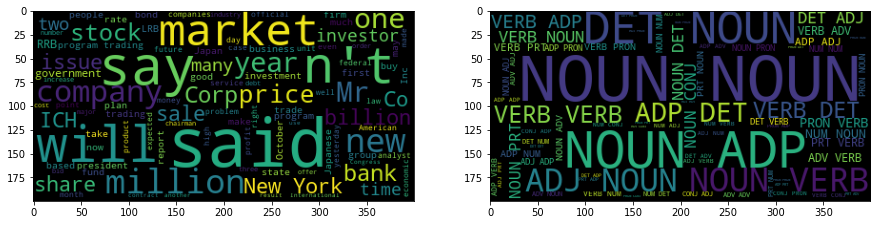

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.imshow(WordCloud(max_words=100).generate(' '.join(word)))

plt.subplot(1,2,2)
plt.imshow(WordCloud().generate(' '.join(tags)))

#### Emission Probability

#### <font color='green'>P(word|tag)

In [13]:
# train_set

In [14]:
def emmision_prob(word,tag,bag=train_set):
    tag_list = [tup for tup in train_set if tup[1]==tag]
    count_tags = len(tag_list)
    word_tag = [tup for tup in tag_list if tup[0]==word]
    count_word_tag = len(word_tag)
    return(count_word_tag,count_tags)

In [15]:
# for tag in tag_set:
#     print(tag,emmision_prob('motion',tag))


#### Transition Probability

#### <font color='green'>P(tag|prev_tag)<br>
    tag = NN, prev_tag = JJ
    Probability of NN followed by JJ.
    sentense ex : DT JJ NN

In [16]:
# train_set

In [17]:
def transition_prob(tag,prev_tag,bag=train_set):
    prev_tags = [tup for tup in train_set if tup[1]==prev_tag]
    count_prev_tag = len(prev_tags)
#     tag_prev_tag = []
    count_tag_prev_tag = 0
    for index in range(len(train_set)-1):
        if(train_set[index][1]==prev_tag and train_set[index+1][1]==tag):
#             tag_prev_tag.append((train_set[index][0],train_set[index+1][0]))
            count_tag_prev_tag = count_tag_prev_tag + 1
            
#     count_tag_prev_tag = len(tag_prev_tag)
            
    return(count_tag_prev_tag,count_prev_tag)
#     return(tag_prev_tag)

In [18]:
# # # # transition_prob('VERB','ADJ')
# # # # transition_prob('DET','.')
# # # # state = ['DET','PRON','.']
# # # # transition_prob('DET',state[-1])
# check = []
# for tag in tag_set:
#     p = transition_prob(tag,'ADP')
#     print(tag,p)
#     check.append(('probability :',p[0]/p[1]))
    
# check

### Build the vanilla Viterbi based POS tagger

In [19]:
# Viterbi Heuristic
def Viterbi(words):
    state = []
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in tag_set:
            if key == 0:
                transition_p = transition_prob(tag,'.')[0]/transition_prob(tag,'.')[1] # P(tag|.)
            else:
                transition_p = transition_prob(tag,state[-1])[0]/transition_prob(tag,state[-1])[1]
                
                
            # compute emission and state probabilities
            emission_p = emmision_prob(word, tag)[0]/emmision_prob(words, tag)[1]
            
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = tag_set[p.index(pmax)]  #doubt
        state.append(state_max)
    return list(zip(words, state))



## Evaluation on Train Set

In [20]:
start = time.time()
plain_train = Viterbi(word[:100])
end = time.time()
print('Time Taken : ',end-start)
print(len(plain_train))

Time Taken :  42.57410979270935
100


In [21]:
list(zip(plain_train,train_set[:100]))

[(('The', 'DET'), ('The', 'DET')),
 (('problem', 'NOUN'), ('problem', 'NOUN')),
 (('involves', 'VERB'), ('involves', 'VERB')),
 (('the', 'DET'), ('the', 'DET')),
 (('motion', 'NOUN'), ('motion', 'NOUN')),
 (('of', 'ADP'), ('of', 'ADP')),
 (('small', 'ADJ'), ('small', 'ADJ')),
 (('magnetic', 'ADJ'), ('magnetic', 'ADJ')),
 (('fields', 'NOUN'), ('fields', 'NOUN')),
 (('within', 'ADP'), ('within', 'ADP')),
 (('superconductor', 'NOUN'), ('superconductor', 'NOUN')),
 (('crystals', 'NOUN'), ('crystals', 'NOUN')),
 ((',', '.'), (',', '.')),
 (('*', 'X'), ('*', 'X')),
 (('limiting', 'VERB'), ('limiting', 'VERB')),
 (('their', 'PRON'), ('their', 'PRON')),
 (('current-carrying', 'ADJ'), ('current-carrying', 'ADJ')),
 (('capacity', 'NOUN'), ('capacity', 'NOUN')),
 (('.', '.'), ('.', '.')),
 (('The', 'DET'), ('The', 'DET')),
 (('company', 'NOUN'), ('company', 'NOUN')),
 (('also', 'ADV'), ('also', 'ADV')),
 (('disclosed', 'VERB'), ('disclosed', 'VERB')),
 (('that', 'ADP'), ('that', 'ADP')),
 (('duri

In [22]:
# # word[:100]
# count= 0
# for i,j in list(zip(x,train_set[:100])):
#     if(i==j):
#         count +=1
        
# count

In [23]:
check = [i for i,j in zip(plain_train,train_set[:100]) if i==j]
accuracy_plain_train = len(check)/len(plain_train)
print(accuracy_plain_train)

[[i,j] for i,j in zip(plain_train,train_set[:100]) if i!=j] #Incorrectly Predicted

0.99


[[('about', 'ADP'), ('about', 'ADV')]]

## Evaluation on Validation Set

In [24]:
print(len(test_set))
test_set[:6]

5255


[('Editorials', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('Greenville', 'NOUN'),
 ('newspaper', 'NOUN'),
 ('allowed', 'VERB')]

In [76]:
test_words = [tup[0] for tup in test_set]
len(test_words)
# test_words

5255

In [77]:
start = time.time()
plain_valid = Viterbi(test_words)
end = time.time()
print('Time Taken :',end-start)
print(len(plain_valid))

Time Taken : 2205.1033837795258
5255


In [78]:
check = [i for i,j in zip(plain_valid,test_set) if i==j]
accuracy_plain_valid = len(check)/len(plain_valid)
print(accuracy_plain_valid)

0.9042816365366317


In [79]:
# plain_valid

In [81]:
incorrect = [[i,j] for i,j in zip(plain_valid,test_set) if i!=j] #Incorrectly Predicted
print("Incorrect :",round(len(incorrect)/len(plain_valid),3))
print(len(incorrect))
incorrect

Incorrect : 0.096
503


[[('Editorials', 'ADP'), ('Editorials', 'NOUN')],
 [('overused', 'ADP'), ('overused', 'VERB')],
 [('smartly', 'ADP'), ('smartly', 'ADV')],
 [('even', 'ADV'), ('even', 'ADJ')],
 [('likely', 'ADJ'), ('likely', 'ADV')],
 [('cause', 'NOUN'), ('cause', 'VERB')],
 [('one', 'NUM'), ('one', 'NOUN')],
 [('2,700', 'ADP'), ('2,700', 'NUM')],
 [('370', 'ADP'), ('370', 'NUM')],
 [('reinstating', 'ADP'), ('reinstating', 'VERB')],
 [('cold', 'NOUN'), ('cold', 'ADJ')],
 [('14.75', 'ADP'), ('14.75', 'NUM')],
 [('furious', 'ADP'), ('furious', 'ADJ')],
 [('microwave', 'ADP'), ('microwave', 'NOUN')],
 [('In', 'ADP'), ('In', 'NOUN')],
 [('column', 'ADP'), ('column', 'NOUN')],
 [('Junk', 'ADP'), ('Junk', 'NOUN')],
 [('earlier', 'ADJ'), ('earlier', 'ADV')],
 [('centennial', 'ADP'), ('centennial', 'NOUN')],
 [('The', 'DET'), ('The', 'NOUN')],
 [('report', 'NOUN'), ('report', 'VERB')],
 [('that', 'ADP'), ('that', 'DET')],
 [('milestones', 'ADP'), ('milestones', 'NOUN')],
 [('American', 'NOUN'), ('American', 'A

## Evaluation on UnSeen Text (Test)

In [26]:
text_test = open('Test_sentences.txt','r').read()

In [27]:
print(text_test)

Android is a mobile operating system developed by Google.
Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
Twitter is an online news and social networking service on which users post and interact with messages known as tweets.
Before entering politics, Donald Trump was a domineering businessman and a television personality.
The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.
This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.
Show me the cheapest round trips from Dallas to Atlanta
I would like to see flights from Denver to Philadelphia.
Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.
NASA invited social media users to experience the launch of ICESAT-2 Satellite.






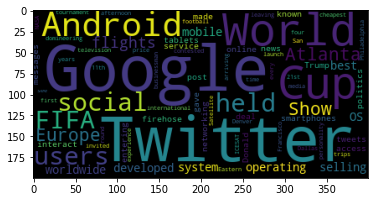

In [28]:
plt.imshow(WordCloud(max_words=100).generate(text_test)) #most words are NOUN

In [30]:
unseen_words = text_test.split()
print(len(unseen_words))
unseen_words[:8]

168


['Android', 'is', 'a', 'mobile', 'operating', 'system', 'developed', 'by']

In [31]:
start = time.time()
plain_test = Viterbi(unseen_words)
end = time.time()
print('Time Taken :',end-start)

print(len(plain_test))
plain_test

Time Taken : 71.07892537117004
168


[('Android', 'ADP'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'ADP'),
 ('Android', 'ADP'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADP'),
 ('OS', 'ADP'),
 ('worldwide', 'ADP'),
 ('on', 'ADP'),
 ('smartphones', 'ADP'),
 ('since', 'ADP'),
 ('2011', 'ADP'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'ADP'),
 ('Google', 'ADP'),
 ('and', 'CONJ'),
 ('Twitter', 'ADP'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'ADP'),
 ('that', 'DET'),
 ('gave', 'VERB'),
 ('Google', 'ADP'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'ADP'),
 ('firehose.', 'ADP'),
 ('Twitter', 'ADP'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'ADP'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('users',

### <font color = 'red'>Words not in Train set

In [82]:
words_not_in_train = [tup for tup in plain_test if tup[0] not in word_set]
# len(words_not_in_train)
print('First tag in tag_set :',tag_set[0])
print(len(words_not_in_train))
words_not_in_train

First tag in tag_set : ADP
43


[('Android', 'ADP'),
 ('Google.', 'ADP'),
 ('Android', 'ADP'),
 ('best-selling', 'ADP'),
 ('OS', 'ADP'),
 ('worldwide', 'ADP'),
 ('smartphones', 'ADP'),
 ('2011', 'ADP'),
 ('2013.', 'ADP'),
 ('Google', 'ADP'),
 ('Twitter', 'ADP'),
 ('2015', 'ADP'),
 ('Google', 'ADP'),
 ("Twitter's", 'ADP'),
 ('firehose.', 'ADP'),
 ('Twitter', 'ADP'),
 ('online', 'ADP'),
 ('interact', 'ADP'),
 ('messages', 'ADP'),
 ('tweets.', 'ADP'),
 ('politics,', 'ADP'),
 ('domineering', 'ADP'),
 ('personality.', 'ADP'),
 ('2018', 'ADP'),
 ('FIFA', 'ADP'),
 ('Cup', 'ADP'),
 ('21st', 'ADP'),
 ('FIFA', 'ADP'),
 ('Cup,', 'ADP'),
 ('tournament', 'ADP'),
 ('contested', 'ADP'),
 ('years.', 'ADP'),
 ('Cup', 'ADP'),
 ('11th', 'ADP'),
 ('Europe.', 'ADP'),
 ('trips', 'ADP'),
 ('Philadelphia.', 'ADP'),
 ('arriving', 'ADP'),
 ('Francisco.', 'ADP'),
 ('NASA', 'ADP'),
 ('invited', 'ADP'),
 ('ICESAT-2', 'ADP'),
 ('Satellite.', 'ADP')]

With Vanilla Viterbi:  for words like Android, Google etc are assigned as first tag in tag_set which is PRT.<br>
Let's handle these unknown words.

### Solve the problem of unknown words

1. Rule Based
2. Probabilistic

In [33]:
print(tag_set)

['ADP', 'NUM', 'PRON', 'ADJ', 'NOUN', '.', 'VERB', 'DET', 'CONJ', 'ADV', 'X', 'PRT']


VERB - verbs (all tenses and modes)
NOUN - nouns (common and proper)
PRON - pronouns
ADJ - adjectives
ADV - adverbs
ADP - adpositions (prepositions and postpositions)
CONJ - conjunctions
DET - determiners
NUM - cardinal numbers
PRT - particles or other function words
X - other: foreign words, typos, abbreviations
. - punctuation

#### Rule Based

In [34]:
def ruleBase(word):
    patterns = [
        (r'.*ing$', 'VERB'),              
        (r'.*ed$', 'VERB'),               
        (r'.*es$', 'VERB'),               
        (r'.*ould$', 'VERB'),              
        (r'.*\'s$', 'NOUN'),              
        (r'.*s$', 'NOUN'),                
        (r'^-?[0-9]+(.[0-9]+)?.?$', 'NUM'), 
        (r'.*', 'NOUN')                    
    ]


    regexp_tagger = nltk.RegexpTagger(patterns)
    return(regexp_tagger.tag_sents([[word]]))

In [35]:
# ss = nltk.UnigramTagger(train_sent)
# ss.evaluate(test_sent)

In [36]:
# ruleBase('2015.')[0][0][1]

In [37]:
# Viterbi Heuristic handling unknown words using rule based technique
def Viterbi_modi1(words):
    state = []
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        if(word not in word_set):
            #001
            tag = ruleBase(word)
            state.append(tag[0][0][1])
        else:
            p = [] 
            for tag in tag_set:
                if key == 0:
                    transition_p = transition_prob(tag,'.')[0]/transition_prob(tag,'.')[1] # P(tag|.)
                else:
                    transition_p = transition_prob(tag,state[-1])[0]/transition_prob(tag,state[-1])[1]


                # compute emission and state probabilities
                emission_p = emmision_prob(word, tag)[0]/emmision_prob(words, tag)[1]

                state_probability = emission_p * transition_p    
                p.append(state_probability)

            pmax = max(p)
            # getting state for which probability is maximum
            state_max = tag_set[p.index(pmax)]  #doubt
            state.append(state_max)
    return list(zip(words, state))



#### Probabilistic

In [38]:
# Viterbi Heuristic
def Viterbi_modi2(words):
    state = []
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in tag_set:
            if key == 0:
                transition_p = transition_prob(tag,'.')[0]/transition_prob(tag,'.')[1] # P(tag|.)
            else:
                transition_p = transition_prob(tag,state[-1])[0]/transition_prob(tag,state[-1])[1]

#             print(emission_ap,'     ',transition_p)
#             if(emission_p==0): #In this case Transition Prob alone can be higher of any tag combo which will become max so that will be assigned instead of the emmision*transition prob
#                 state_probability = transition_p
#                 p.append(state_probability)

  # compute emission and state probabilities
                #handling Unknown words within Vterbi
            if(word not in word_set):
                state_probability = transition_p
                p.append(state_probability)
            else:
                emission_p = emmision_prob(word, tag)[0]/emmision_prob(words, tag)[1]
                state_probability = emission_p * transition_p    
                p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = tag_set[p.index(pmax)]  #doubt
        state.append(state_max)
    return list(zip(words, state))



In [39]:
# p = []
# if('Google' not in word_set):
#     for tag in tag_set:
#         state_probability = transition_prob(tag,'DET')[0]/transition_prob(tag,'DET')[1]
#         p.append(state_probability)
# else:
#     print('Already in Train Set')

In [40]:
# print(max(p))
# dict(zip(tag_set,p))


# Evaluating tagging accuracy

### Evaluation on Train set using Viterbi Modi1 and Viterbi Modi2

### Modi1

In [41]:
start = time.time()
modi1_train = Viterbi_modi1(word[:100])
end = time.time()
print('Time Taken: ',end-start)
print(len(modi1_train))

Time Taken:  42.92701840400696
100


In [42]:
list(zip(modi1_train,train_set[:100]))

[(('The', 'DET'), ('The', 'DET')),
 (('problem', 'NOUN'), ('problem', 'NOUN')),
 (('involves', 'VERB'), ('involves', 'VERB')),
 (('the', 'DET'), ('the', 'DET')),
 (('motion', 'NOUN'), ('motion', 'NOUN')),
 (('of', 'ADP'), ('of', 'ADP')),
 (('small', 'ADJ'), ('small', 'ADJ')),
 (('magnetic', 'ADJ'), ('magnetic', 'ADJ')),
 (('fields', 'NOUN'), ('fields', 'NOUN')),
 (('within', 'ADP'), ('within', 'ADP')),
 (('superconductor', 'NOUN'), ('superconductor', 'NOUN')),
 (('crystals', 'NOUN'), ('crystals', 'NOUN')),
 ((',', '.'), (',', '.')),
 (('*', 'X'), ('*', 'X')),
 (('limiting', 'VERB'), ('limiting', 'VERB')),
 (('their', 'PRON'), ('their', 'PRON')),
 (('current-carrying', 'ADJ'), ('current-carrying', 'ADJ')),
 (('capacity', 'NOUN'), ('capacity', 'NOUN')),
 (('.', '.'), ('.', '.')),
 (('The', 'DET'), ('The', 'DET')),
 (('company', 'NOUN'), ('company', 'NOUN')),
 (('also', 'ADV'), ('also', 'ADV')),
 (('disclosed', 'VERB'), ('disclosed', 'VERB')),
 (('that', 'ADP'), ('that', 'ADP')),
 (('duri

In [43]:
check = [i for i,j in zip(modi1_train,train_set[:100]) if i==j]
accuracy_modi1_train = len(check)/len(modi1_train)
print('Accuracy using Modi1 on Train Set : ',accuracy_modi1_train)

[[i,j] for i,j in zip(modi1_train,train_set[:100]) if i!=j] #Incorrectly Predicted

Accuracy using Modi1 on Train Set :  0.99


[[('about', 'ADP'), ('about', 'ADV')]]

### Modi2

In [44]:
start = time.time()
modi2_train= Viterbi_modi2(word[:100])
end = time.time()
print('Time Taken: ',end-start)
print(len(modi2_train))

Time Taken:  42.24815630912781
100


In [51]:
list(zip(modi2_train,train_set[:100]))

[(('The', 'DET'), ('The', 'DET')),
 (('problem', 'NOUN'), ('problem', 'NOUN')),
 (('involves', 'VERB'), ('involves', 'VERB')),
 (('the', 'DET'), ('the', 'DET')),
 (('motion', 'NOUN'), ('motion', 'NOUN')),
 (('of', 'ADP'), ('of', 'ADP')),
 (('small', 'ADJ'), ('small', 'ADJ')),
 (('magnetic', 'ADJ'), ('magnetic', 'ADJ')),
 (('fields', 'NOUN'), ('fields', 'NOUN')),
 (('within', 'ADP'), ('within', 'ADP')),
 (('superconductor', 'NOUN'), ('superconductor', 'NOUN')),
 (('crystals', 'NOUN'), ('crystals', 'NOUN')),
 ((',', '.'), (',', '.')),
 (('*', 'X'), ('*', 'X')),
 (('limiting', 'VERB'), ('limiting', 'VERB')),
 (('their', 'PRON'), ('their', 'PRON')),
 (('current-carrying', 'ADJ'), ('current-carrying', 'ADJ')),
 (('capacity', 'NOUN'), ('capacity', 'NOUN')),
 (('.', '.'), ('.', '.')),
 (('The', 'DET'), ('The', 'DET')),
 (('company', 'NOUN'), ('company', 'NOUN')),
 (('also', 'ADV'), ('also', 'ADV')),
 (('disclosed', 'VERB'), ('disclosed', 'VERB')),
 (('that', 'ADP'), ('that', 'ADP')),
 (('duri

In [46]:
check = [i for i,j in zip(modi2_train,train_set[:100]) if i==j]

accuracy_modi2_train = len(check)/len(modi2_train)
print('Accuracy using Modi1 on Train Set : ',accuracy_modi2_train)

[[i,j] for i,j in zip(modi2_train,train_set[:100]) if i!=j] #Incorrectly Predicted

Accuracy using Modi1 on Train Set :  0.99


[[('about', 'ADP'), ('about', 'ADV')]]

### Evaluation on Validation set using Viterbi Modi1 and Viterbi Modi2

In [50]:
test_words = [tup[0] for tup in test_set]
len(test_words)

5255

## Modi1

In [52]:
start = time.time()
modi1_valid = Viterbi_modi1(test_words)
end = time.time()
print('Time Taken in seconds:',end-start)
print(len(modi1_valid))
modi1_valid

Time Taken in seconds: 2061.001341819763
5255


[('Editorials', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('Greenville', 'NOUN'),
 ('newspaper', 'NOUN'),
 ('allowed', 'VERB'),
 ('that', 'ADP'),
 ('Mrs.', 'NOUN'),
 ('Yeargin', 'NOUN'),
 ('was', 'VERB'),
 ('wrong', 'ADJ'),
 (',', '.'),
 ('but', 'CONJ'),
 ('also', 'ADV'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('the', 'DET'),
 ('case', 'NOUN'),
 ('showed', 'VERB'),
 ('how', 'ADV'),
 ('testing', 'NOUN'),
 ('was', 'VERB'),
 ('being', 'VERB'),
 ('overused', 'VERB'),
 ('*-2', 'X'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('--', '.'),
 ('And', 'CONJ'),
 ('the', 'DET'),
 ('USIA', 'NOUN'),
 ('said', 'VERB'),
 ('that', 'ADP'),
 ('all', 'DET'),
 ('of', 'ADP'),
 ('us', 'PRON'),
 ('could', 'VERB'),
 ('take', 'VERB'),
 ('extensive', 'ADJ'),
 ('notes', 'NOUN'),
 ('.', '.'),
 ('Meanwhile', 'ADV'),
 (',', '.'),
 ('many', 'ADJ'),
 ('market', 'NOUN'),
 ('watchers', 'NOUN'),
 ('say', 'VERB'),
 ('0', 'X'),
 ('recent', 'ADJ'),
 ('dividend', 'NOUN'),
 ('trends', 'NOUN'),
 ('raise', 'VERB'),
 ('another', 'DET'),
 ('warni

In [53]:
check = [i for i,j in zip(modi1_valid,test_set) if i==j]

accuracy_modi1_valid = len(check)/len(modi1_valid)
print('Accuracy using Modi1 on Train Set : ',accuracy_modi1_valid)


Accuracy using Modi1 on Train Set :  0.9482397716460513


In [54]:
incorrect = [[i,j] for i,j in zip(modi1_valid,test_set) if i!=j] #Incorrectly Predicted
print("Incorrect :",round(len(incorrect)/len(modi1_valid),3))
print(len(incorrect))
incorrect

Incorrect : 0.052
272


[[('smartly', 'NOUN'), ('smartly', 'ADV')],
 [('even', 'ADV'), ('even', 'ADJ')],
 [('likely', 'ADJ'), ('likely', 'ADV')],
 [('cause', 'NOUN'), ('cause', 'VERB')],
 [('one', 'NUM'), ('one', 'NOUN')],
 [('cold', 'NOUN'), ('cold', 'ADJ')],
 [('furious', 'NOUN'), ('furious', 'ADJ')],
 [('In', 'ADP'), ('In', 'NOUN')],
 [('earlier', 'ADJ'), ('earlier', 'ADV')],
 [('The', 'DET'), ('The', 'NOUN')],
 [('report', 'NOUN'), ('report', 'VERB')],
 [('that', 'ADP'), ('that', 'DET')],
 [('milestones', 'VERB'), ('milestones', 'NOUN')],
 [('American', 'NOUN'), ('American', 'ADJ')],
 [('adopt', 'NOUN'), ('adopt', 'VERB')],
 [('shareholder-rights', 'NOUN'), ('shareholder-rights', 'ADJ')],
 [('unwanted', 'VERB'), ('unwanted', 'ADJ')],
 [('that', 'ADP'), ('that', 'DET')],
 [('*T*-189', 'NOUN'), ('*T*-189', 'X')],
 [('up', 'ADV'), ('up', 'PRT')],
 [('stones', 'VERB'), ('stones', 'NOUN')],
 [('that', 'ADP'), ('that', 'DET')],
 [('*T*-190', 'NOUN'), ('*T*-190', 'X')],
 [('treats', 'NOUN'), ('treats', 'VERB')],

## Modi2

In [55]:
start = time.time()
modi2_valid = Viterbi_modi2(test_words)
end = time.time()
print('Time Taken in seconds:',end-start)
print(len(modi2_valid))
modi2_valid

Time Taken in seconds: 2158.318336248398
5255


[('Editorials', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('Greenville', 'NOUN'),
 ('newspaper', 'NOUN'),
 ('allowed', 'VERB'),
 ('that', 'ADP'),
 ('Mrs.', 'NOUN'),
 ('Yeargin', 'NOUN'),
 ('was', 'VERB'),
 ('wrong', 'ADJ'),
 (',', '.'),
 ('but', 'CONJ'),
 ('also', 'ADV'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('the', 'DET'),
 ('case', 'NOUN'),
 ('showed', 'VERB'),
 ('how', 'ADV'),
 ('testing', 'NOUN'),
 ('was', 'VERB'),
 ('being', 'VERB'),
 ('overused', 'X'),
 ('*-2', 'X'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('--', '.'),
 ('And', 'CONJ'),
 ('the', 'DET'),
 ('USIA', 'NOUN'),
 ('said', 'VERB'),
 ('that', 'ADP'),
 ('all', 'DET'),
 ('of', 'ADP'),
 ('us', 'PRON'),
 ('could', 'VERB'),
 ('take', 'VERB'),
 ('extensive', 'ADJ'),
 ('notes', 'NOUN'),
 ('.', '.'),
 ('Meanwhile', 'ADV'),
 (',', '.'),
 ('many', 'ADJ'),
 ('market', 'NOUN'),
 ('watchers', 'NOUN'),
 ('say', 'VERB'),
 ('0', 'X'),
 ('recent', 'ADJ'),
 ('dividend', 'NOUN'),
 ('trends', 'NOUN'),
 ('raise', 'VERB'),
 ('another', 'DET'),
 ('warning'

In [56]:
check = [i for i,j in zip(modi2_valid,test_set) if i==j]
accuracy_modi2_valid = len(check)/len(modi2_valid)
print('Accuracy using Modi1 on Train Set : ',accuracy_modi2_valid)


Accuracy using Modi1 on Train Set :  0.9349191246431969


In [58]:
incorrect = [[i,j] for i,j in zip(modi2_valid,test_set) if i!=j] #Incorrectly Predicted
print("Incorrect :",round(len(incorrect)/len(modi2_valid),3))
print(len(incorrect))
incorrect

Incorrect : 0.065
342


[[('overused', 'X'), ('overused', 'VERB')],
 [('smartly', 'X'), ('smartly', 'ADV')],
 [('even', 'ADV'), ('even', 'ADJ')],
 [('likely', 'ADJ'), ('likely', 'ADV')],
 [('cause', 'NOUN'), ('cause', 'VERB')],
 [('one', 'NUM'), ('one', 'NOUN')],
 [('2,700', 'X'), ('2,700', 'NUM')],
 [('370', 'NOUN'), ('370', 'NUM')],
 [('cold', 'NOUN'), ('cold', 'ADJ')],
 [('14.75', 'NOUN'), ('14.75', 'NUM')],
 [('furious', 'X'), ('furious', 'ADJ')],
 [('In', 'ADP'), ('In', 'NOUN')],
 [('earlier', 'ADJ'), ('earlier', 'ADV')],
 [('centennial', 'VERB'), ('centennial', 'NOUN')],
 [('The', 'DET'), ('The', 'NOUN')],
 [('report', 'NOUN'), ('report', 'VERB')],
 [('that', 'ADP'), ('that', 'DET')],
 [('milestones', 'DET'), ('milestones', 'NOUN')],
 [('American', 'NOUN'), ('American', 'ADJ')],
 [('adopt', 'X'), ('adopt', 'VERB')],
 [('shareholder-rights', 'NOUN'), ('shareholder-rights', 'ADJ')],
 [('unwanted', 'VERB'), ('unwanted', 'ADJ')],
 [('suitors', 'X'), ('suitors', 'NOUN')],
 [('that', 'ADP'), ('that', 'DET')],

### Evaluation on Test set using Viterbi Modi1 and Viterbi Modi2

In [59]:
print(text_test)

Android is a mobile operating system developed by Google.
Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
Twitter is an online news and social networking service on which users post and interact with messages known as tweets.
Before entering politics, Donald Trump was a domineering businessman and a television personality.
The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.
This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.
Show me the cheapest round trips from Dallas to Atlanta
I would like to see flights from Denver to Philadelphia.
Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.
NASA invited social media users to experience the launch of ICESAT-2 Satellite.






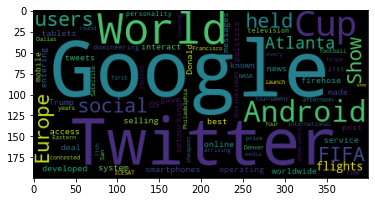

In [60]:
plt.imshow(WordCloud(max_words=100).generate(text_test)) #most words are NOUN

By seeing above word distribution , most of the words are Google, World, Twitter, Android, Fifa, Cup which all are NOUN

## Modi1

In [61]:
unseen_words = text_test.split()
start = time.time()
modi1_test = Viterbi_modi1(unseen_words)
end = time.time()
print('Time Taken in seconds:',end-start)

Time Taken in seconds: 54.285388469696045


In [62]:
print(len(modi1_test))
modi1_test

168


[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'NOUN'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'VERB'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'VERB'),
 ('since', 'ADP'),
 ('2011', 'NUM'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'NUM'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'NUM'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'NOUN'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'NOUN'),
 ('firehose.', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET

### <font color = 'red'>Words not in Train set

In [83]:
words_not_in_train = [tup for tup in modi1_test if tup[0] not in word_set]
print(len(words_not_in_train))
print('First tag in tag_set :',tag_set[0])
words_not_in_train

43
First tag in tag_set : ADP


[('Android', 'NOUN'),
 ('Google.', 'NOUN'),
 ('Android', 'NOUN'),
 ('best-selling', 'VERB'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('smartphones', 'VERB'),
 ('2011', 'NUM'),
 ('2013.', 'NUM'),
 ('Google', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('2015', 'NUM'),
 ('Google', 'NOUN'),
 ("Twitter's", 'NOUN'),
 ('firehose.', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('online', 'NOUN'),
 ('interact', 'NOUN'),
 ('messages', 'VERB'),
 ('tweets.', 'NOUN'),
 ('politics,', 'NOUN'),
 ('domineering', 'VERB'),
 ('personality.', 'NOUN'),
 ('2018', 'NUM'),
 ('FIFA', 'NOUN'),
 ('Cup', 'NOUN'),
 ('21st', 'NOUN'),
 ('FIFA', 'NOUN'),
 ('Cup,', 'NOUN'),
 ('tournament', 'NOUN'),
 ('contested', 'VERB'),
 ('years.', 'NOUN'),
 ('Cup', 'NOUN'),
 ('11th', 'NOUN'),
 ('Europe.', 'NOUN'),
 ('trips', 'NOUN'),
 ('Philadelphia.', 'NOUN'),
 ('arriving', 'VERB'),
 ('Francisco.', 'NOUN'),
 ('NASA', 'NOUN'),
 ('invited', 'VERB'),
 ('ICESAT-2', 'NOUN'),
 ('Satellite.', 'NOUN')]

By Analysing the words in Test Corpus , Tags seems to be finely correct using Modi1 Viterbi Model

## Modi2

In [65]:
unseen_words = text_test.split()
start = time.time()
modi2_test = Viterbi_modi2(unseen_words)
end = time.time()
print('Time Taken in seconds:',end-start)

Time Taken in seconds: 66.93168640136719


In [66]:
print(len(modi2_test))
modi2_test

168


[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'DET'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'NOUN'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'DET'),
 ('since', 'ADP'),
 ('2011', 'DET'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'DET'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'DET'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'X'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'VERB'),
 ('firehose.', 'X'),
 ('Twitter', 'VERB'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('u

### <font color = 'red'>Words not in Train set

In [67]:
words_not_in_train_2 = [tup for tup in modi2_test if tup[0] not in word_set]
print(len(words_not_in_train_2))
print('First tag in tag_set :',tag_set[0])
words_not_in_train_2

43
First tag in tag_set : ADP


[('Android', 'NOUN'),
 ('Google.', 'DET'),
 ('Android', 'NOUN'),
 ('best-selling', 'NOUN'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('smartphones', 'DET'),
 ('2011', 'DET'),
 ('2013.', 'DET'),
 ('Google', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('2015', 'DET'),
 ('Google', 'X'),
 ("Twitter's", 'VERB'),
 ('firehose.', 'X'),
 ('Twitter', 'VERB'),
 ('online', 'NOUN'),
 ('interact', 'NOUN'),
 ('messages', 'DET'),
 ('tweets.', 'DET'),
 ('politics,', 'X'),
 ('domineering', 'NOUN'),
 ('personality.', 'NOUN'),
 ('2018', 'NOUN'),
 ('FIFA', 'NOUN'),
 ('Cup', 'NOUN'),
 ('21st', 'NOUN'),
 ('FIFA', 'NOUN'),
 ('Cup,', 'NOUN'),
 ('tournament', 'NOUN'),
 ('contested', 'NOUN'),
 ('years.', 'NOUN'),
 ('Cup', 'NOUN'),
 ('11th', 'NOUN'),
 ('Europe.', 'DET'),
 ('trips', 'NOUN'),
 ('Philadelphia.', 'VERB'),
 ('arriving', 'NOUN'),
 ('Francisco.', 'NOUN'),
 ('NASA', 'NOUN'),
 ('invited', 'NOUN'),
 ('ICESAT-2', 'DET'),
 ('Satellite.', 'NOUN')]

## Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [68]:
# plt.pie?
# accuracy_plain_valid
# list(zip(3,5))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


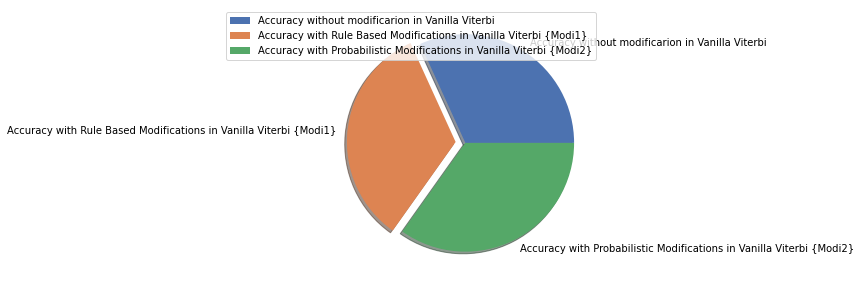

In [85]:
# def pie_labels(x,y,z):   
#     return '{:.1f}%\n({:d} g)'.format(x)
import seaborn as sb
# plt.pie(figs,labels= label,explode=[0,0,0],autopct=pie_labels(accuracy_plain_valid,accuracy_modi1_valid,accuracy_modi1_valid),shadow=True)
plt.figure(figsize=(20,5))
figs = [accuracy_plain_valid,accuracy_modi1_valid,accuracy_modi2_train]
label = ['Accuracy without modificarion in Vanilla Viterbi','Accuracy with Rule Based Modifications in Vanilla Viterbi {Modi1}',
        'Accuracy with Probabilistic Modifications in Vanilla Viterbi {Modi2}']
plt.pie(figs,labels= label,explode=[0,0.09,0],shadow=True,colors=sb.color_palette('deep'))
plt.legend()

In [86]:
#Vanilla Viterbi
print('Accuracy with Plain Vanilla Viterbi on Train Set                   :',accuracy_plain_train)
print('Accuracy with Plain Vanilla Viterbi on Validaiton Set              :',accuracy_plain_valid)
print('\n')
#modi1 Viterbi
print('Accuracy with rule based modified Vanilla Viterbi on Train Set     :',accuracy_modi1_train)
print('\033[1m'+'Accuracy with rule based modified Vanilla Viterbi on Validaiton Set:',accuracy_modi1_valid,'\033[0m')
print('\n')
#modi2 Viterbi
print('Accuracy with Probability modified Vanilla Viterbi on Train Set     :',accuracy_modi2_train)
print('Accuracy with Probability modified Vanilla Viterbi on Validation Set:',accuracy_modi2_valid)

Accuracy with Plain Vanilla Viterbi on Train Set                   : 0.99
Accuracy with Plain Vanilla Viterbi on Validaiton Set              : 0.9042816365366317


Accuracy with rule based modified Vanilla Viterbi on Train Set     : 0.99
Accuracy with rule based modified Vanilla Viterbi on Validaiton Set: 0.9482397716460513 


Accuracy with Probability modified Vanilla Viterbi on Train Set     : 0.99
Accuracy with Probability modified Vanilla Viterbi on Validation Set: 0.9349191246431969


### Observations:

1. Accuracy on Train set is same for all the Viterbi (modified or non-modified) as in case of modified, all the words exist in Train Set.
2. Accuracy on Validation set using modi1 modified version of Viterbi is good which is based on Rule Based POS Tageer.
3. Accuracy on Validaiton set using modi2 modified version of Viterbi is better over the Plain Vanilla Viterbi but modi1 performs so well.

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

Cases which are incorrecly tagged by Original POS tagger<br>
Every word is tagged as (X){can change in each run} as it is the first tag in tag_set

In [87]:
# print(len(plain_test))
# plain_test

In [88]:
# print(len(modi1_test))
# modi1_test
df_ = pd.DataFrame()

In [89]:
df_['Vanilla Vitetbi'] = plain_test
df_['Modi1 Viterbi'] = modi1_test
df_['Modi2 Viterbi'] = modi2_test

In [90]:
df_.head(25)
df_.loc[[0,8,13,14,17,19,24]]

,Vanilla Vitetbi,Modi1 Viterbi,Modi2 Viterbi
0,"(Android, ADP)","(Android, NOUN)","(Android, NOUN)"
8,"(Google., ADP)","(Google., NOUN)","(Google., DET)"
13,"(best-selling, ADP)","(best-selling, VERB)","(best-selling, NOUN)"
14,"(OS, ADP)","(OS, NOUN)","(OS, NOUN)"
17,"(smartphones, ADP)","(smartphones, VERB)","(smartphones, DET)"
19,"(2011, ADP)","(2011, NUM)","(2011, DET)"
24,"(2013., ADP)","(2013., NUM)","(2013., DET)"


1. Words Like Google, Android are actually NOUN but tagged as (.) as first tag in tag_set and 2011,2015. are also tagges as (.) which are actaully NUM in Vanilla VIterbi.

2. Some of the words got corrected by Modi2 Viterbi like Andorid, Google are tagges as NOUN but words like 2011 , 2013, etc tagged as DET which are actually NUM.

3. Words like Android, Google are tagged as NOUN also the words like 2011, 2013. are correctly tagged as NUM by Modi1 Viterbi.

Cases which were correctly tagged by Original POS tagger (Plain Vanilla Viterbi)

In [91]:
correct_with_plain = [[i,j] for i,j in zip(plain_valid,test_set) if i==j] #Incorrectly Predicted
print("correct :",round(len(correct_with_plain)/len(plain_valid),3))
print(len(correct_with_plain))
correct_with_plain

# plain_wala_inc = [i for i,j in correct_with_plain]
# for i,j in incorrect_with_plain:
#     print(i,j)
# plain_wala_inc

correct : 0.904
4752


[[('in', 'ADP'), ('in', 'ADP')],
 [('the', 'DET'), ('the', 'DET')],
 [('Greenville', 'NOUN'), ('Greenville', 'NOUN')],
 [('newspaper', 'NOUN'), ('newspaper', 'NOUN')],
 [('allowed', 'VERB'), ('allowed', 'VERB')],
 [('that', 'ADP'), ('that', 'ADP')],
 [('Mrs.', 'NOUN'), ('Mrs.', 'NOUN')],
 [('Yeargin', 'NOUN'), ('Yeargin', 'NOUN')],
 [('was', 'VERB'), ('was', 'VERB')],
 [('wrong', 'ADJ'), ('wrong', 'ADJ')],
 [(',', '.'), (',', '.')],
 [('but', 'CONJ'), ('but', 'CONJ')],
 [('also', 'ADV'), ('also', 'ADV')],
 [('said', 'VERB'), ('said', 'VERB')],
 [('0', 'X'), ('0', 'X')],
 [('the', 'DET'), ('the', 'DET')],
 [('case', 'NOUN'), ('case', 'NOUN')],
 [('showed', 'VERB'), ('showed', 'VERB')],
 [('how', 'ADV'), ('how', 'ADV')],
 [('testing', 'NOUN'), ('testing', 'NOUN')],
 [('was', 'VERB'), ('was', 'VERB')],
 [('being', 'VERB'), ('being', 'VERB')],
 [('*-2', 'X'), ('*-2', 'X')],
 [('*T*-1', 'X'), ('*T*-1', 'X')],
 [('.', '.'), ('.', '.')],
 [('--', '.'), ('--', '.')],
 [('And', 'CONJ'), ('And',

Cases which were correctly tagged by Modi1 POS tagger (Modi1 Viterbi)

In [92]:
correct_with_modi1 = [[i,j] for i,j in zip(modi1_valid,test_set) if i==j] #Incorrectly Predicted
print("correct :",round(len(correct_with_modi1)/len(modi1_valid),3))
print(len(correct_with_modi1))
correct_with_modi1

# modi1_wala_inc = [i for i,j in incorrect_with_modi1]
# modi1_wala_inc

correct : 0.948
4983


[[('Editorials', 'NOUN'), ('Editorials', 'NOUN')],
 [('in', 'ADP'), ('in', 'ADP')],
 [('the', 'DET'), ('the', 'DET')],
 [('Greenville', 'NOUN'), ('Greenville', 'NOUN')],
 [('newspaper', 'NOUN'), ('newspaper', 'NOUN')],
 [('allowed', 'VERB'), ('allowed', 'VERB')],
 [('that', 'ADP'), ('that', 'ADP')],
 [('Mrs.', 'NOUN'), ('Mrs.', 'NOUN')],
 [('Yeargin', 'NOUN'), ('Yeargin', 'NOUN')],
 [('was', 'VERB'), ('was', 'VERB')],
 [('wrong', 'ADJ'), ('wrong', 'ADJ')],
 [(',', '.'), (',', '.')],
 [('but', 'CONJ'), ('but', 'CONJ')],
 [('also', 'ADV'), ('also', 'ADV')],
 [('said', 'VERB'), ('said', 'VERB')],
 [('0', 'X'), ('0', 'X')],
 [('the', 'DET'), ('the', 'DET')],
 [('case', 'NOUN'), ('case', 'NOUN')],
 [('showed', 'VERB'), ('showed', 'VERB')],
 [('how', 'ADV'), ('how', 'ADV')],
 [('testing', 'NOUN'), ('testing', 'NOUN')],
 [('was', 'VERB'), ('was', 'VERB')],
 [('being', 'VERB'), ('being', 'VERB')],
 [('overused', 'VERB'), ('overused', 'VERB')],
 [('*-2', 'X'), ('*-2', 'X')],
 [('*T*-1', 'X'), (

Cases which were correctly tagged by Modi1 POS tagger (Modi2 Viterbi)

In [93]:
correct_with_modi2 = [[i,j] for i,j in zip(modi2_valid,test_set) if i==j] #Incorrectly Predicted
print("correct :",round(len(correct_with_modi2)/len(modi2_valid),3))
print(len(correct_with_modi2))
correct_with_modi2

correct : 0.935
4913


[[('Editorials', 'NOUN'), ('Editorials', 'NOUN')],
 [('in', 'ADP'), ('in', 'ADP')],
 [('the', 'DET'), ('the', 'DET')],
 [('Greenville', 'NOUN'), ('Greenville', 'NOUN')],
 [('newspaper', 'NOUN'), ('newspaper', 'NOUN')],
 [('allowed', 'VERB'), ('allowed', 'VERB')],
 [('that', 'ADP'), ('that', 'ADP')],
 [('Mrs.', 'NOUN'), ('Mrs.', 'NOUN')],
 [('Yeargin', 'NOUN'), ('Yeargin', 'NOUN')],
 [('was', 'VERB'), ('was', 'VERB')],
 [('wrong', 'ADJ'), ('wrong', 'ADJ')],
 [(',', '.'), (',', '.')],
 [('but', 'CONJ'), ('but', 'CONJ')],
 [('also', 'ADV'), ('also', 'ADV')],
 [('said', 'VERB'), ('said', 'VERB')],
 [('0', 'X'), ('0', 'X')],
 [('the', 'DET'), ('the', 'DET')],
 [('case', 'NOUN'), ('case', 'NOUN')],
 [('showed', 'VERB'), ('showed', 'VERB')],
 [('how', 'ADV'), ('how', 'ADV')],
 [('testing', 'NOUN'), ('testing', 'NOUN')],
 [('was', 'VERB'), ('was', 'VERB')],
 [('being', 'VERB'), ('being', 'VERB')],
 [('*-2', 'X'), ('*-2', 'X')],
 [('*T*-1', 'X'), ('*T*-1', 'X')],
 [('.', '.'), ('.', '.')],
 [('

In [94]:
corrected_byt_modi1 = []
for li in correct_with_modi1:
#     print(li)
    if li not in correct_with_plain:
#         corrected_byt_modi1.append(tup_in_incorrect_with_plain)
        corrected_byt_modi1.append(li)
len(corrected_byt_modi1)


227

In [95]:
corrected_byt_modi2 = []
for li in correct_with_modi2:
#     print(li)
    if li not in correct_with_plain:
#         corrected_byt_modi1.append(tup_in_incorrect_with_plain)
        corrected_byt_modi2.append(li)
len(corrected_byt_modi2)


154

### Records which are correctly tagged by modified Viterbi (using Rule Based Tagger),  Modi1

In [96]:
print(corrected_byt_modi1)

[[('Editorials', 'NOUN'), ('Editorials', 'NOUN')], [('overused', 'VERB'), ('overused', 'VERB')], [('2,700', 'NUM'), ('2,700', 'NUM')], [('370', 'NUM'), ('370', 'NUM')], [('reinstating', 'VERB'), ('reinstating', 'VERB')], [('14.75', 'NUM'), ('14.75', 'NUM')], [('microwave', 'NOUN'), ('microwave', 'NOUN')], [('column', 'NOUN'), ('column', 'NOUN')], [('Junk', 'NOUN'), ('Junk', 'NOUN')], [('centennial', 'NOUN'), ('centennial', 'NOUN')], [('suitors', 'NOUN'), ('suitors', 'NOUN')], [('laser', 'NOUN'), ('laser', 'NOUN')], [('kidney', 'NOUN'), ('kidney', 'NOUN')], [('lesions', 'NOUN'), ('lesions', 'NOUN')], [('resulted', 'VERB'), ('resulted', 'VERB')], [('indifference', 'NOUN'), ('indifference', 'NOUN')], [('7.422', 'NUM'), ('7.422', 'NUM')], [('Soldado', 'NOUN'), ('Soldado', 'NOUN')], [('Minera', 'NOUN'), ('Minera', 'NOUN')], [('Disputada', 'NOUN'), ('Disputada', 'NOUN')], [('slab', 'NOUN'), ('slab', 'NOUN')], [('solutions', 'NOUN'), ('solutions', 'NOUN')], [('inflated', 'VERB'), ('inflated',

### Records which are correctly tagged by modified Viterbi (using Probability),  Modi2

In [97]:
print(corrected_byt_modi2)

[[('Editorials', 'NOUN'), ('Editorials', 'NOUN')], [('reinstating', 'VERB'), ('reinstating', 'VERB')], [('microwave', 'NOUN'), ('microwave', 'NOUN')], [('column', 'NOUN'), ('column', 'NOUN')], [('Junk', 'NOUN'), ('Junk', 'NOUN')], [('laser', 'NOUN'), ('laser', 'NOUN')], [('lesions', 'NOUN'), ('lesions', 'NOUN')], [('resulted', 'VERB'), ('resulted', 'VERB')], [('indifference', 'NOUN'), ('indifference', 'NOUN')], [('Bronces', 'NOUN'), ('Bronces', 'NOUN')], [('Soldado', 'NOUN'), ('Soldado', 'NOUN')], [('Minera', 'NOUN'), ('Minera', 'NOUN')], [('Disputada', 'NOUN'), ('Disputada', 'NOUN')], [('slab', 'NOUN'), ('slab', 'NOUN')], [('inflated', 'VERB'), ('inflated', 'VERB')], [('fighters', 'NOUN'), ('fighters', 'NOUN')], [('Jews', 'NOUN'), ('Jews', 'NOUN')], [('traitor', 'NOUN'), ('traitor', 'NOUN')], [('copied', 'VERB'), ('copied', 'VERB')], [('Taurus', 'NOUN'), ('Taurus', 'NOUN')], [('Sable', 'NOUN'), ('Sable', 'NOUN')], [('experiencing', 'VERB'), ('experiencing', 'VERB')], [('irony', 'NOUN'